# Homework done by : Selma Zouitina / Nizar Madani

170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/10
1563/1563 [==============================] - 81s 49ms/step - loss: 0.4066 - accuracy: 0.8304 - val_loss: 0.4176 - val_accuracy: 0.8360
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.3390 - accuracy: 0.8603 - val_loss: 0.3237 - val_accuracy: 0.8671
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.3058 - accuracy: 0.8753 - val_loss: 0.3047 - val_accuracy: 0.8765
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.2808 - accuracy: 0.8864 - val_loss: 0.2832 - val_accuracy: 0.8868
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.2615 - accuracy: 0.8963 - val_loss: 0.2894 - val_accuracy: 0.8872
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.2436 - accuracy: 0.9025 - val_loss: 0.2885 - val_accuracy: 0.8871
Epoch 7/10
1563/1563 [==============================] - 7

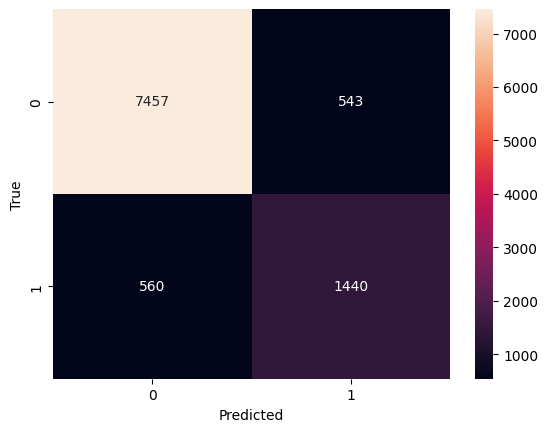

Precision: 0.7262
Recall: 0.7200
F1 Score: 0.7231
Accuracy: 0.8897


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset
def load_preprocess_data():
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
    train_labels = train_labels.flatten()
    test_labels = test_labels.flatten()

    # Define classes that can fly (1) and cannot fly (0)
    can_fly = [0, 2]  # airplane, bird
    cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # all other classes

    # Create binary labels for the new task
    train_labels = np.array([1 if label in can_fly else 0 for label in train_labels])
    test_labels = np.array([1 if label in can_fly else 0 for label in test_labels])

    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0

    return train_images, train_labels, test_images, test_labels

# Build the CNN model
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Compile and train the model
def compile_and_train_model(model, train_images, train_labels, test_images, test_labels):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))
    return history

# Evaluate the model
def evaluate_model(model, test_images, test_labels):
    predictions = model.predict(test_images)
    predictions = (predictions > 0.5).astype(int)

    print("Classification Report:")
    print(classification_report(test_labels, predictions))

    print("Confusion Matrix:")
    cm = confusion_matrix(test_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Compute and print evaluation metrics
    precision = precision_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    accuracy = accuracy_score(test_labels, predictions)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

# Main execution
if __name__ == "__main__":
    train_images, train_labels, test_images, test_labels = load_preprocess_data()
    model = build_model()
    compile_and_train_model(model, train_images, train_labels, test_images, test_labels)
    evaluate_model(model, test_images, test_labels)
